In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [9]:
dataset = pd.read_csv('datasets/ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/4, random_state=0
)

In [11]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

/Users/Alexander/Virtualenvs/ml-data-processing/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
classifier = GaussianNB()
classifier = classifier.fit(X_train, y_train)

In [15]:
# in order to see the accuracy of this model we use a confusion matrix
matrix = confusion_matrix(y_test, classifier.predict(X_test))
matrix

array([[65,  3],
       [ 7, 25]])

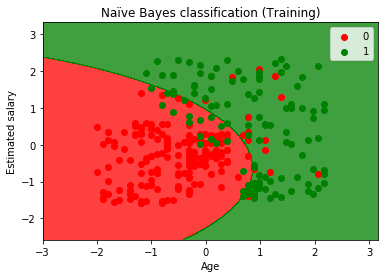

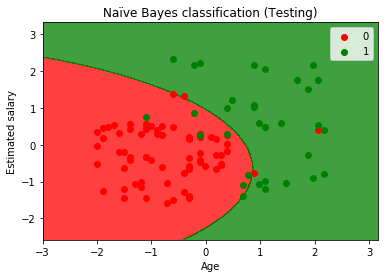

In [16]:
# now we create a plotting function and plot our train and test sets
def plot_classifier(X_set, y_set, set_description='Training'):
    """
    We visualise the decision boundary. First create a new meshgrid from
    our test set and fill it with datapoints for every value of 0.01
    in between our min and max of the first and second column.
    Subtracting and adding 1 to each, so our datapoints don't 
    get squashed up to the sides of the graph.
    """
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
    )
    # we then go over each data point in our new mesh and predict if the value is 0 or 1 and apply
    # a color to it.
    plot.contourf(
        X1, X2, 
        classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.75,
        cmap=ListedColormap(('red', 'green'))
     )
    # we set the limits of the graph to the limits of our mesh grid.
    plot.xlim(X1.min(), X1.max())
    plot.ylim(X2.min(), X2.max())

    # and add our training set data points.
    for i, j in enumerate(np.unique(y_set)):
        plot.scatter(
            X_set[y_set == j, 0],
            X_set[y_set == j, 1],
            c=ListedColormap(('red', 'green'))(i),
            label=j
        )

    plot.title(f'Naïve Bayes classification ({set_description})')
    plot.xlabel('Age')
    plot.ylabel('Estimated salary')
    plot.legend()
    plot.show()

plot_classifier(X_train, y_train)
plot_classifier(X_test, y_test, 'Testing')